# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Dermatology dataset

In [9]:
Xy = pd.read_csv('./datasets/dermatology.csv')

X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [10]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [11]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8513513513513513, 0.9459459459459459, 0.8378378378378378, 0.8918918918918919, 0.9594594594594594, 0.8783783783783784, 0.8513513513513513, 0.9054054054054054, 0.8378378378378378, 0.8243243243243243, 0.8918918918918919, 0.8108108108108109, 0.8513513513513513, 0.8513513513513513, 0.8918918918918919, 0.9324324324324325, 0.9054054054054054, 0.9054054054054054, 0.8783783783783784, 0.918918918918919]

Accuracy:
0.8810810810810809

Standard Deviation:
0.0399963475322939

Confusion Matrix:
   6  2   1   3   4   5
6  3  0   0   0   0   0
2  0  8   0   0   6   1
1  0  0  16   0   0   0
3  0  0   0  16   0   0
4  0  4   0   0  10   0
5  0  0   0   0   0  10
    3   1  6   4   5  2
3  15   0  0   0   0  0
1   0  19  0   0   0  0
6   0   0  6   0   0  0
4   0   0  0  12   0  0
5   0   0  0   0  11  1
2   0   0  0   3   0  7
    3   1  4   5   2  6
3  10   0  0   0   0  0
1   0  19  0   0   0  0
4   0   0  4   1   0  0
5   0   0  2  12   0  0

In [12]:
confusion_matrix_mean(knn_confusion_matrix_list)

,6,2,1,3,4,5
6,4,0,0,0,0,0
2,0,9,0,0,2,0
1,0,0,19,0,0,0
3,0,0,0,14,0,0
4,0,2,0,0,8,0
5,0,0,0,0,0,9


# Showing dmc informations computed

In [13]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.4189189189189189, 0.47297297297297297, 0.5540540540540541, 0.4594594594594595, 0.527027027027027, 0.4189189189189189, 0.4864864864864865, 0.5405405405405406, 0.4594594594594595, 0.4864864864864865, 0.4189189189189189, 0.3918918918918919, 0.43243243243243246, 0.47297297297297297, 0.4594594594594595, 0.7027027027027027, 0.527027027027027, 0.40540540540540543, 0.4864864864864865, 0.4864864864864865]

Accuracy:
0.48040540540540533

Standard Deviation:
0.06763172629582292

Confusion Matrix:
   6  2  1   3  4  5
6  3  0  0   0  0  0
2  3  3  2   4  3  0
1  2  0  8   0  5  1
3  0  0  0  11  5  0
4  1  2  0   8  3  0
5  0  0  6   0  1  3
   3   1  6  4  5  2
3  8   0  0  7  0  0
1  3  11  2  3  0  0
6  0   0  6  0  0  0
4  3   0  3  6  0  0
5  2   0  3  4  3  0
2  2   0  5  2  0  1
   3   1  4  5  2  6
3  9   0  0  0  0  1
1  1  14  2  0  0  2
4  2   0  1  0  0  2
5  2   0  2  6  0  4
2  4   0  7  0  5  4
6  0   0  0  0  0  6
    1   3

In [14]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,6,2,1,3,4,5
6,4,0,0,0,0,0
2,2,3,1,2,1,0
1,3,1,12,1,1,0
3,0,1,0,9,1,0
4,2,2,0,1,3,0
5,2,1,1,1,1,3


# Showing kmeans informations computed

In [15]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.5540540540540541, 0.6621621621621622, 0.6081081081081081, 0.5945945945945946, 0.6216216216216216, 0.581081081081081, 0.6351351351351351, 0.6756756756756757, 0.6756756756756757, 0.5945945945945946, 0.581081081081081, 0.5540540540540541, 0.6621621621621622, 0.6216216216216216, 0.6081081081081081, 0.581081081081081, 0.7432432432432432, 0.5945945945945946, 0.6486486486486487, 0.6081081081081081]

Accuracy:
0.6202702702702704

Standard Deviation:
0.04560685683969244

Confusion Matrix:
   6  2   1   3  4  5
6  3  0   0   0  0  0
2  1  4   0   2  1  7
1  0  0  14   0  1  1
3  0  0   0  16  0  0
4  0  3   1   5  0  5
5  0  0   2   3  1  4
    3   1  6  4  5  2
3  15   0  0  0  0  0
1   0  19  0  0  0  0
6   0   0  6  0  0  0
4   2   7  0  2  0  1
5   1   3  0  1  5  2
2   2   4  1  1  0  2
   3   1  4  5  2  6
3  9   0  0  1  0  0
1  0  18  0  1  0  0
4  0   2  0  2  1  0
5  0   2  4  8  0  0
2  0   1  8  5  5  1
6  0   0  0  0  1  

In [16]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,6,2,1,3,4,5
6,4,0,0,0,0,0
2,0,4,1,0,3,2
1,0,0,18,0,0,1
3,0,0,0,13,0,0
4,0,4,1,0,1,1
5,0,2,1,0,1,4


# Showing naive bayes informations computed

In [17]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.7702702702702703, 0.8243243243243243, 0.9324324324324325, 0.8918918918918919, 0.8918918918918919, 0.8918918918918919, 0.8648648648648649, 0.918918918918919, 0.8783783783783784, 0.918918918918919, 0.8513513513513513, 0.918918918918919, 0.9459459459459459, 0.9594594594594594, 0.9054054054054054, 0.8648648648648649, 0.9459459459459459, 0.8783783783783784, 0.8783783783783784, 0.8243243243243243]

Accuracy:
0.8878378378378378

Standard Deviation:
0.04564688041636361

Confusion Matrix:
   6   2   1   3  4  5
6  3   0   0   0  0  0
2  0  15   0   0  0  0
1  0   0  16   0  0  0
3  0   0   0  15  1  0
4  0  14   0   0  0  0
5  0   2   0   0  0  8
    3   1  6  4   5   2
3  15   0  0  0   0   0
1   0  19  0  0   0   0
6   0   0  6  0   0   0
4   0   0  0  0   0  12
5   0   0  0  0  12   0
2   0   0  0  1   0   9
    3   1  4   5   2  6
3  10   0  0   0   0  0
1   0  19  0   0   0  0
4   0   0  4   0   1  0
5   0   0  0  14   0  0

In [18]:
confusion_matrix_mean(nb_confusion_matrix_list)

,6,2,1,3,4,5
6,4,0,0,0,0,0
2,0,12,0,0,0,0
1,0,0,20,0,0,0
3,0,0,0,13,0,0
4,0,5,0,0,5,0
5,0,0,0,0,0,10


# Showing bayes informations computed

In [19]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9459459459459459, 0.8513513513513513, 0.7972972972972973, 0.9324324324324325, 0.9594594594594594, 0.8783783783783784, 0.9864864864864865, 0.9324324324324325, 0.8513513513513513, 0.918918918918919, 0.9459459459459459, 0.8783783783783784, 0.9054054054054054, 0.9054054054054054, 0.9054054054054054, 0.9324324324324325, 0.8648648648648649, 0.9324324324324325, 0.9594594594594594, 0.8918918918918919]

Accuracy:
0.9087837837837839

Standard Deviation:
0.044384229459229714

Confusion Matrix:
   6   2   1   3   4   5
6  3   0   0   0   0   0
2  0  13   0   0   2   0
1  0   0  16   0   0   0
3  1   0   0  15   0   0
4  1   0   0   0  13   0
5  0   0   0   0   0  10
    3   1  6   4   5  2
3  15   0  0   0   0  0
1   0  19  0   0   0  0
6   0   0  0   4   0  2
4   0   0  0  12   0  0
5   0   0  0   1  11  0
2   1   1  0   2   0  6
   3   1  4   5   2  6
3  8   0  0   2   0  0
1  0  19  0   0   0  0
4  0   0  5   0   0  0
5  0   0  0  14 

In [20]:
confusion_matrix_mean(b_confusion_matrix_list)

,6,2,1,3,4,5
6,2,0,0,0,0,0
2,0,10,0,0,1,0
1,0,0,20,0,0,0
3,0,0,0,13,0,0
4,0,0,0,0,10,0
5,0,0,0,0,0,10


# Choosing two columns from the last X_train and X_test to plot decision surface

In [21]:
X_train_2d, X_test_2d = X_train[['erythema', 'scaling']], X_test[['erythema', 'scaling']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     erythema  scaling
293         2        2
353         1        1
31          3        2
308         2        1
115         2        2
..        ...      ...
66          2        2
201         1        1
78          0        0
365         3        2
152         3        3

[292 rows x 2 columns]
Test dataset:
     erythema  scaling
298         2        1
117         2        2
30          3        2
310         3        2
223         2        1
..        ...      ...
258         1        2
35          2        2
87          2        1
74          2        1
329         2        2

[74 rows x 2 columns]


# Training the models with the new dataset 2d

In [22]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

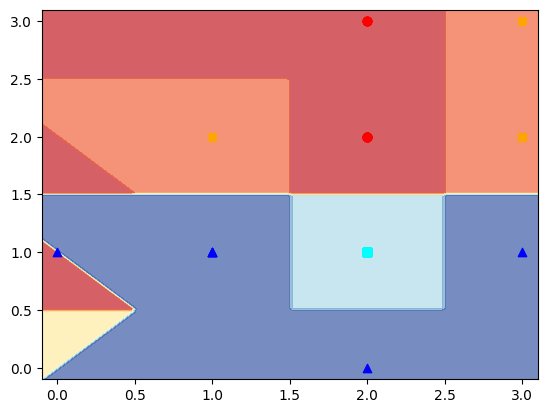

In [23]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)
four = np.where(knn_y_pred == 4)
five = np.where(knn_y_pred == 5)
six = np.where(knn_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting dmc decision surface

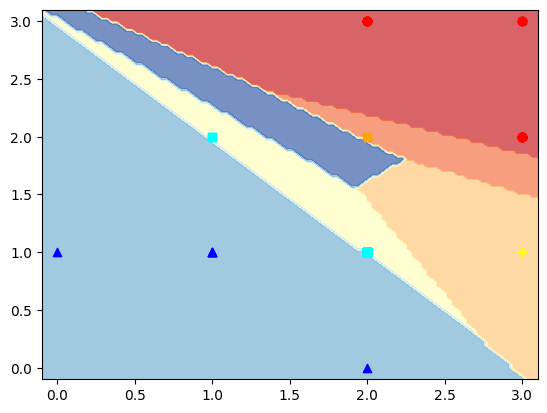

In [24]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)
four = np.where(dmc_y_pred == 4)
five = np.where(dmc_y_pred == 5)
six = np.where(dmc_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting kmeans decision surface

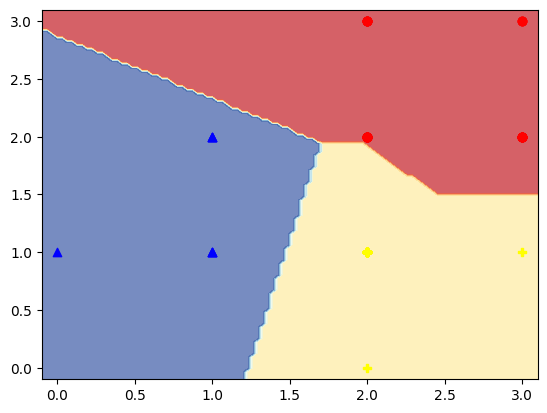

In [25]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

one = np.where(kmeans_y_pred == 1)
two = np.where(kmeans_y_pred == 2)
three = np.where(kmeans_y_pred == 3)
four = np.where(kmeans_y_pred == 4)
five = np.where(kmeans_y_pred == 5)
six = np.where(kmeans_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting naive bayes decision surface

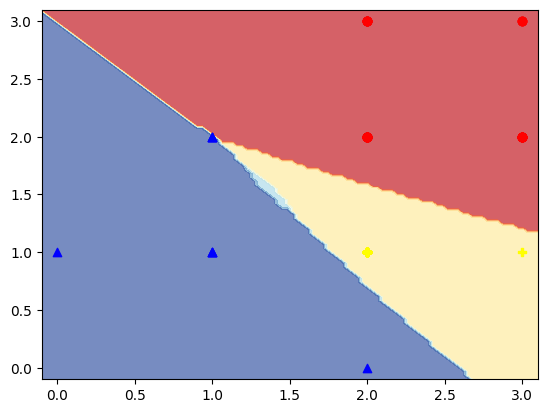

In [26]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

one = np.where(nb_y_pred == 1)
two = np.where(nb_y_pred == 2)
three = np.where(nb_y_pred == 3)
four = np.where(nb_y_pred == 4)
five = np.where(nb_y_pred == 5)
six = np.where(nb_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes decision surface

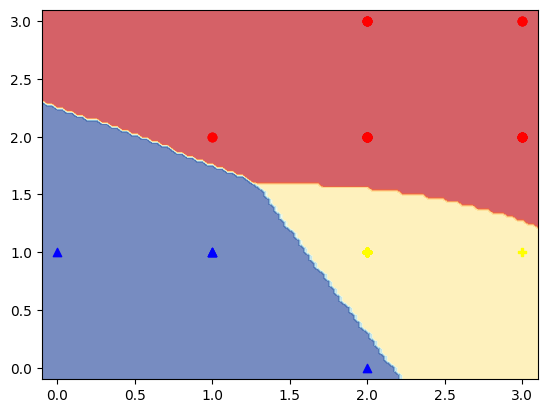

In [27]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)
four = np.where(b_y_pred == 4)
five = np.where(b_y_pred == 5)
six = np.where(b_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()